<a href="https://colab.research.google.com/github/Anisafi/UASJST/blob/main/skema_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [33]:
# Melakukan import library-library yang dibutuhkan oleh program
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Mengimpor dataset dengan format CSV
df=pd.read_csv("/content/drive/MyDrive/uas_jst/kelompok 5/dataset covid 2/dataCovid.csv")

# Mencetak jumlah baris dan kolom serta menampilkan sampel data
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (287, 3)


,Tanggal,Jumlah positif,Positif harian
0,29/02/2020,0,0
1,01/03/2020,0,0
2,02/03/2020,0,0
3,03/03/2020,3,3
4,04/03/2020,3,0


In [34]:
# Menentukan data Covid-19 untuk training sejumlah 201 baris dan mengambil kolom jumlah positif
training_set = df.iloc[:201, 1:2].values

In [35]:
# Proses feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Membuat prediksi dengan 30 time-steps
X_train = []
y_train = []
for i in range(30, 201):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
# Mulai melakukan pemrosesan RNN
model = Sequential()
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))
# Menambahkan output layer
model.add(Dense(units = 1))
# Melihat rancangan RNN kita
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)            │ (None, 30, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_21 (SimpleRNN)            │ (None, 30, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_22 (SimpleRNN)            │ (None, 30, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_23 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Melakukan compile RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Menjalankan RNN ke Training set
history = model.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - loss: 0.6057
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2810
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3463
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2904
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2822
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3730
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2723
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2655
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2206
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2341
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1918
Epoch 12/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1635
Epoch 13/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1668
Epoch 14/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1591
Epoch 15/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

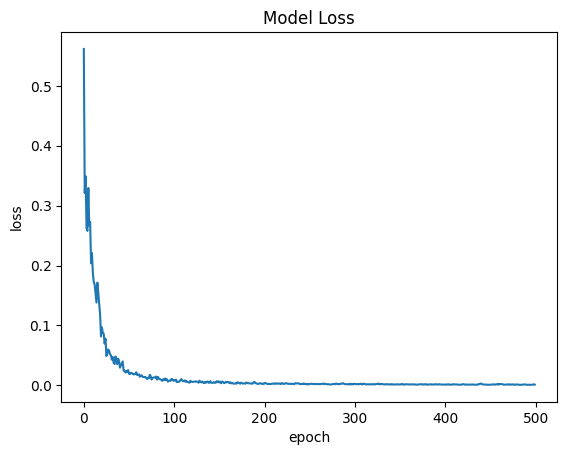

In [38]:
# Menampilkan grafik Model Loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [39]:
# Menentukan data Covid-19 untuk test menggunakan sisa data
dataset_train = df.iloc[:201, 1:2]
dataset_test = df.iloc[201:, 1:2]

# Melakukan prediksi kasus Covid-19
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 116):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(dataset_test.values.shape)

(86, 1)


In [40]:
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)
print(prediction.astype(int))

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step
[[60950]
 [61826]
 [62473]
 [63381]
 [64046]
 [64731]
 [65475]
 [65970]
 [66660]
 [67234]
 [67901]
 [68438]
 [68970]
 [69578]
 [70069]
 [70648]
 [71104]
 [71668]
 [72068]
 [72424]
 [72877]
 [73282]
 [73772]
 [74124]
 [74623]
 [75032]
 [75423]
 [75890]
 [76287]
 [76710]
 [77046]
 [77422]
 [77622]
 [77861]
 [78149]
 [78399]
 [78701]
 [78926]
 [79237]
 [79439]
 [79630]
 [79846]
 [80039]
 [80270]
 [80388]
 [80592]
 [80749]
 [80877]
 [81090]
 [81323]
 [81585]
 [81807]
 [82065]
 [82231]
 [82367]
 [82555]
 [82740]
 [82954]
 [83125]
 [83344]
 [83507]
 [83659]
 [83861]
 [84045]
 [84260]
 [84435]
 [84638]
 [84806]
 [84947]
 [85134]
 [85299]
 [85466]
 [85621]
 [85784]
 [85905]
 [86020]
 [86167]
 [86307]
 [86452]
 [86609]
 [86764]
 [86872]
 [86969]
 [87071]
 [87201]
 [87301]]


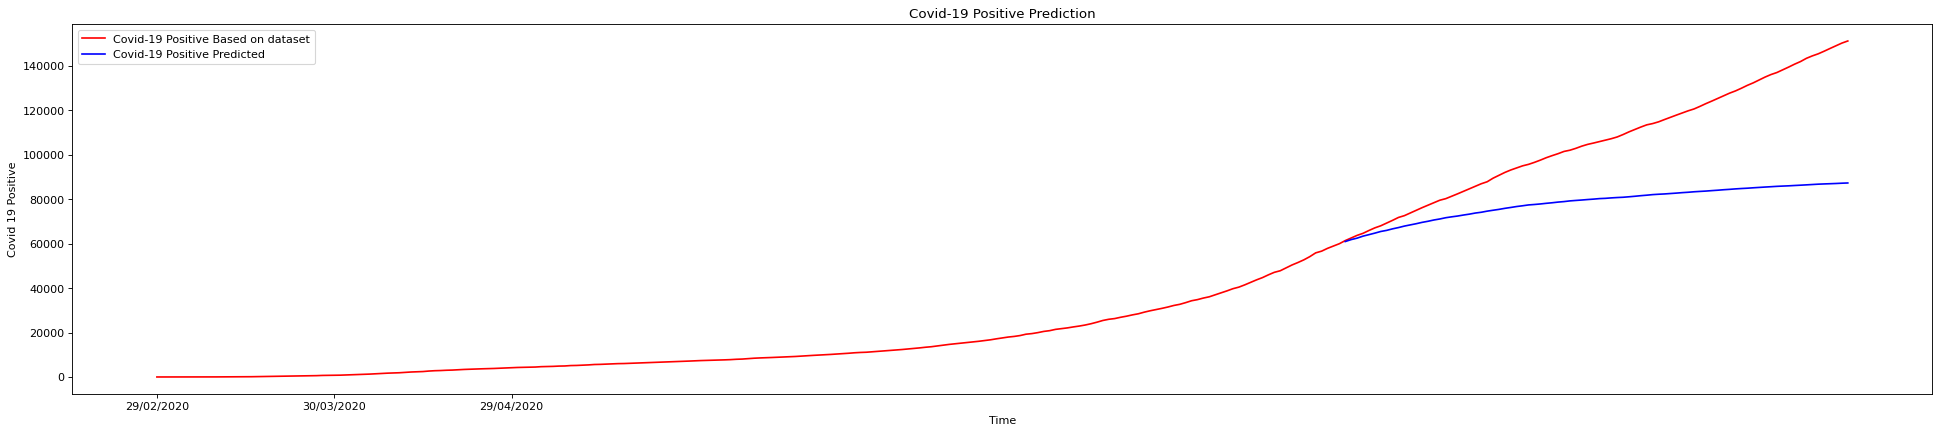

In [41]:
# Visualisasi perbandingan hasil prediksi dan data sesunguhnya
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.loc[:, 'Tanggal'],dataset_total.values, color = 'red', label = 'Covid-19 Positive Based on dataset')
plt.plot(df.loc[201:, 'Tanggal'],prediction.astype(int), color = 'blue', label = 'Covid-19 Positive Predicted')
plt.xticks(np.arange(0,66,30))
plt.title('Covid-19 Positive Prediction')
plt.xlabel('Time')
plt.ylabel('Covid 19 Positive')
plt.legend()
plt.show()